In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import glob 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import load_img, img_to_array, array_to_img 
from keras.models import load_model 

%matplotlib inline

Using TensorFlow backend.


In [3]:
tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

##### We will now load a sample image that is not a part of any of our datasets and try to see the predictions of our different models.

(1, 150, 150, 3)


TypeError: 'AxesImage' object is not callable

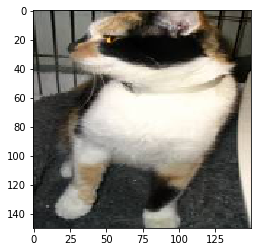

In [4]:
# basic configurations 
IMG_DIM = (150, 150) 
input_shape = (150, 150, 3) 
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for 
                                          x in l] 
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x   
                                         in l] 

# load sample image 
sample_img_path = 'data/test_data/cat.10025.jpg' 
sample_img = load_img(sample_img_path, target_size=IMG_DIM) 
sample_img_tensor = img_to_array(sample_img) 
sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0) 
sample_img_tensor /= 255. 
print(sample_img_tensor.shape) 
plt.imshow(sample_img_tensor[0]) (1, 150, 150, 3)

In [5]:
tl_img_aug_finetune_cnn.layers[0].layers[1:9] 

Sample layer shape: (1, 150, 150, 64)
Sample convolution (activation map) shape: (150, 150)


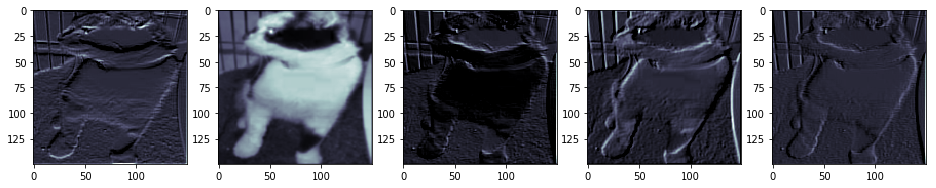

In [7]:
from keras import models 

# Extracts the outputs of the top 8 layers: 
layer_outputs = [layer.output for layer in  
                     tl_img_aug_finetune_cnn.layers[0].layers[1:9]] 

# Creates a model that will return these outputs, given the model input: 
activation_model = models.Model(
                       inputs=tl_img_aug_finetune_cnn.layers[0].layers[1].input,  
                       outputs=layer_outputs) 

# This will return a list of 8 Numpy arrays 
# one array per layer activation 
activations = activation_model.predict(sample_img_tensor) 
print('Sample layer shape:', activations[0].shape) 
print('Sample convolution (activation map) shape:', 
                           activations[0][0, :, :, 1].shape) 

fig, ax = plt.subplots(1,5, figsize=(16, 6)) 
ax[0].imshow(activations[0][0, :, :, 10], cmap='bone') 
ax[1].imshow(activations[0][0, :, :, 25], cmap='bone') 
ax[2].imshow(activations[0][0, :, :, 40], cmap='bone') 
ax[3].imshow(activations[0][0, :, :, 55], cmap='bone') 
ax[4].imshow(activations[0][0, :, :, 63], cmap='bone') 

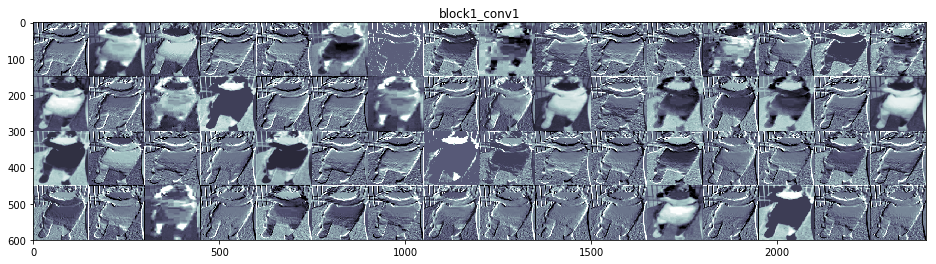

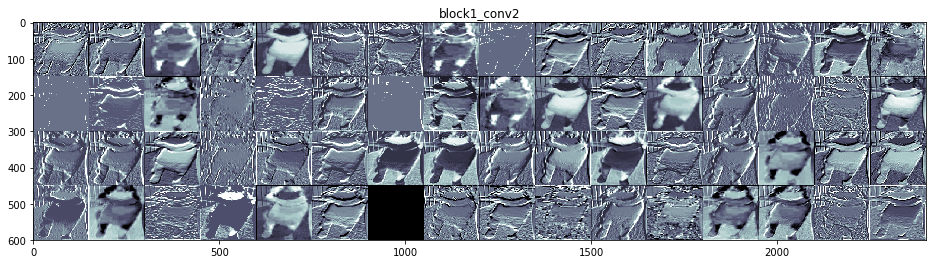

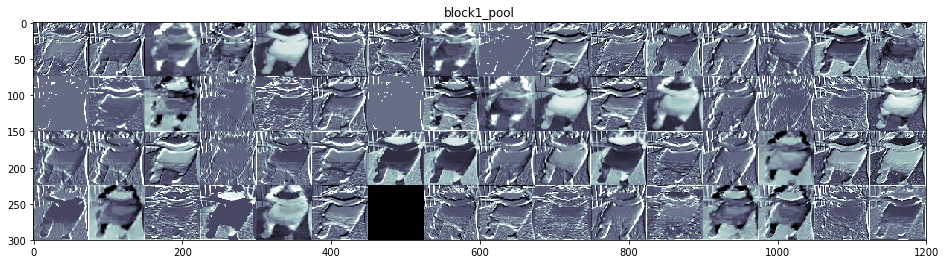

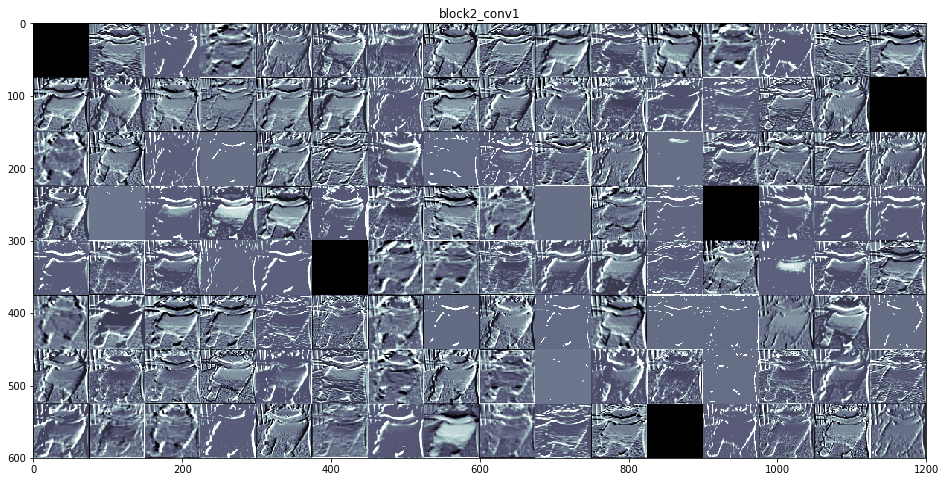

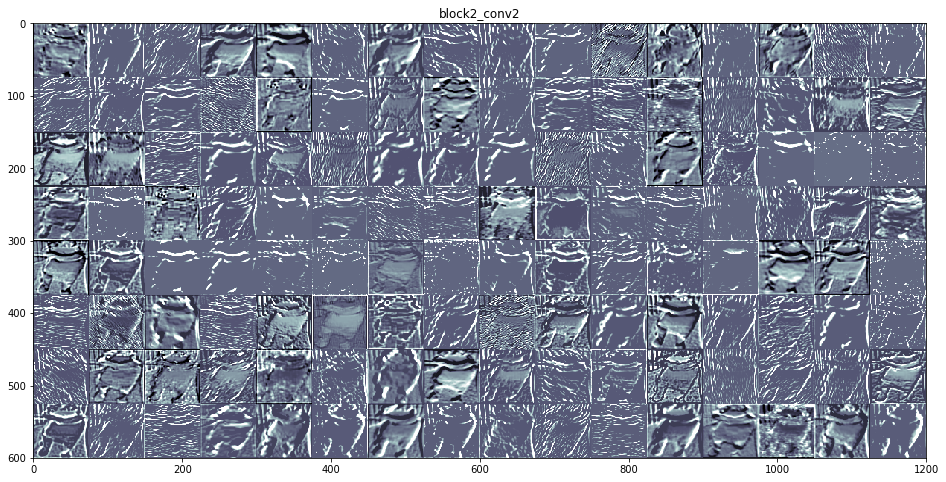

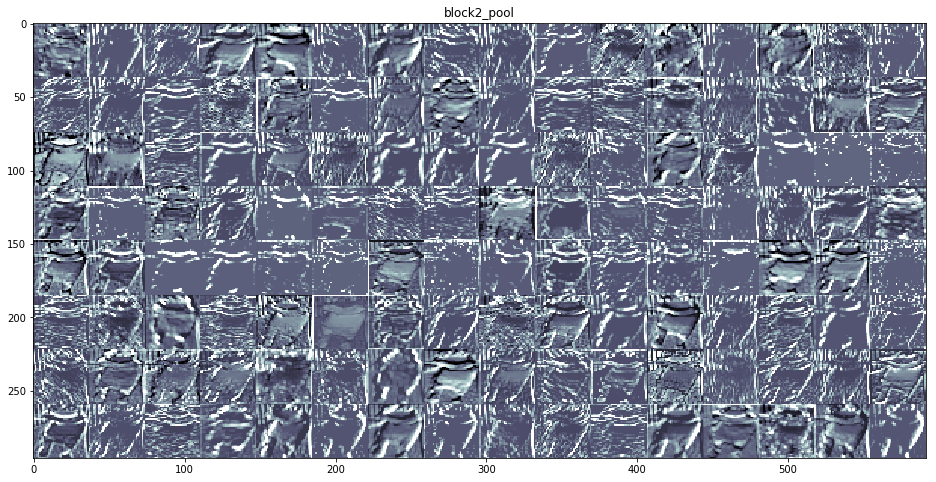

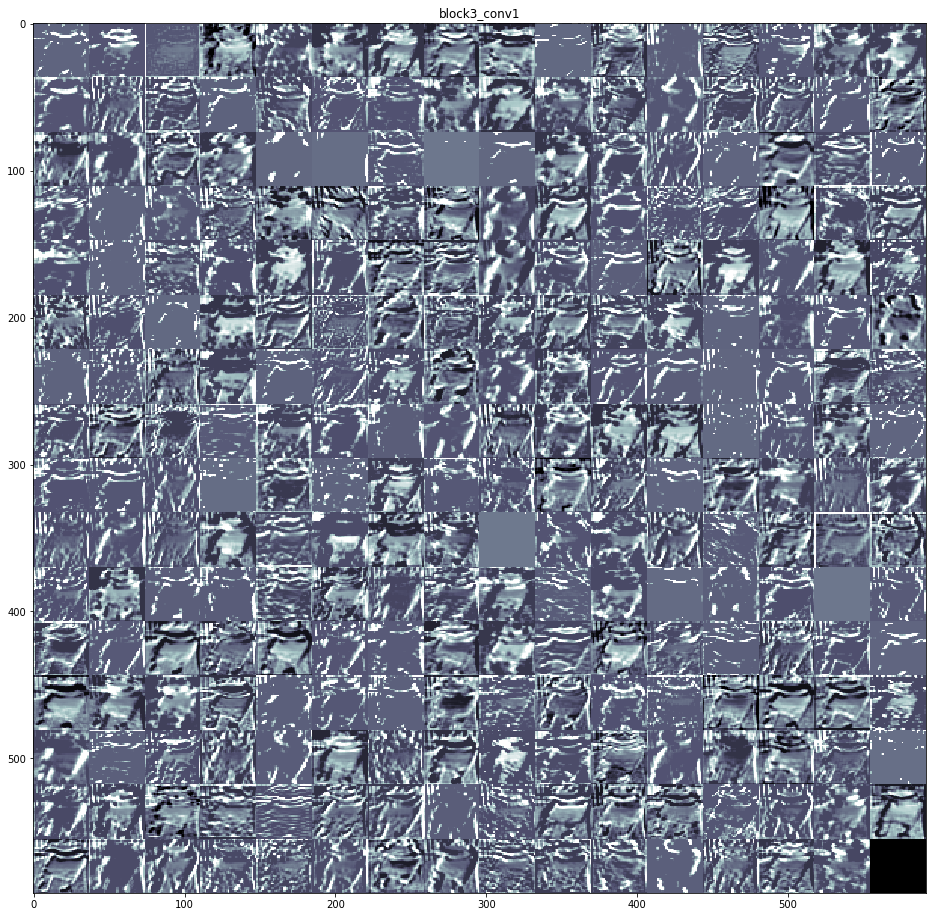

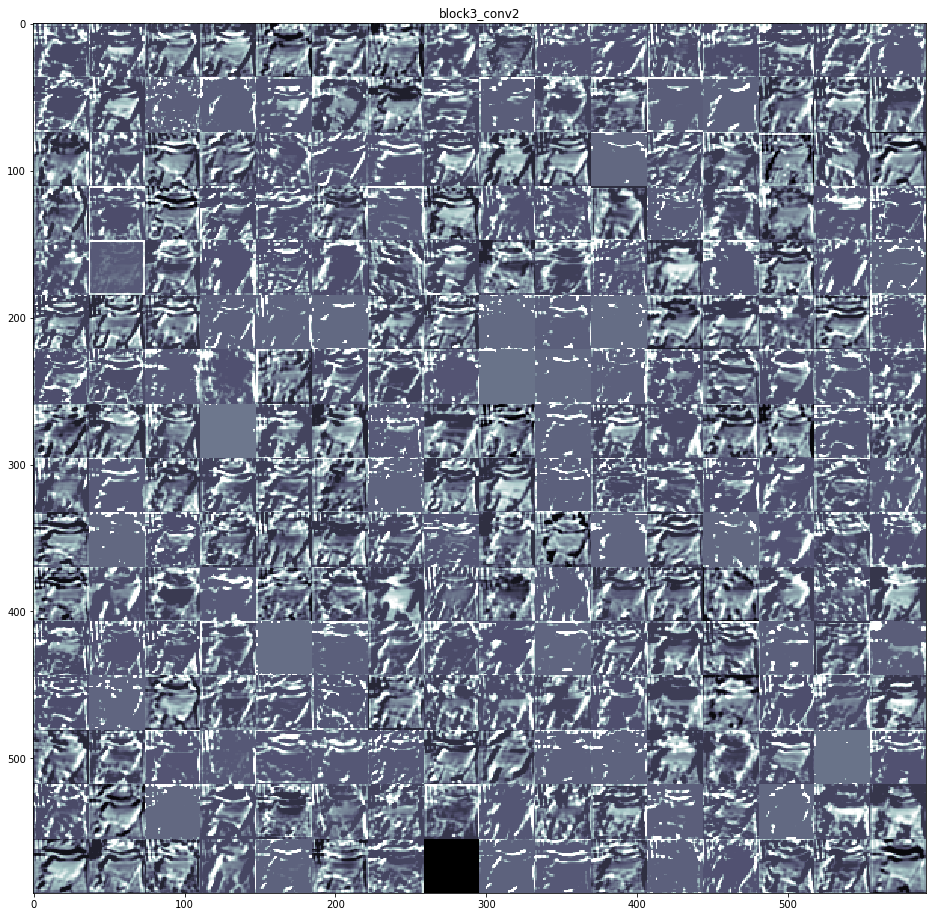

In [10]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in tl_img_aug_finetune_cnn.layers[0].layers[1:9]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')